# Introduction to Bias-Variance Tradeoff through Logistic Regression


Welcome to our practical session on logistic regression, where we'll explore the critical concept of the bias-variance tradeoff in machine learning. Models with high bias oversimplify reality and tend to underperform, while models with high variance capture too much noise, leading to overfitting. Through logistic regression and the application of regularization techniques, we'll learn how to balance bias and variance, optimizing our models for better accuracy on unseen data. Let's dive into this fundamental balance to enhance our machine learning skills.

In this practical session, we will be working with a dataset that provides historical records of water level changes and the corresponding flow of water from a dam. The data is represented through two key variables: x for the change in water level and y for the amount of water flowing out of the dam.

Our dataset is thoughtfully partitioned into three distinct subsets to facilitate a comprehensive learning experience:

**Training Set (X, y)**: This is the primary dataset upon which your model will train. It includes various instances of water level changes and the corresponding flow measurements, allowing the model to learn the underlying patterns.

**Cross Validation Set (Xval, yval)**: This subset is crucial for fine-tuning the model's regularization parameter. It helps determine the optimal balance between bias and variance, ensuring the model generalizes well to new, unseen data.

**Test Set (Xtest, ytest)**: Comprising data that the model has never encountered during its training phase, this set is essential for evaluating the final performance of your model. It offers a clear picture of how well the model can predict water flow from new water level changes.

Load the dataset using `scipy.io`, `loadmat` function

In [12]:
import scipy.io as sio
import matplotlib.pyplot as plt

In [55]:
# Load pre-split dataset provided by exercise
data = sio.loadmat('ex5data1.mat')

In [56]:
type(data)

dict

Display the key of the dict

In [57]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'Xtest', 'ytest', 'Xval', 'yval'])

Now extract, data for train / validation / test

We can call those variables
- x_train, y_train
- x_val, y_val
- x_test, y_test

In [58]:
x_train = data['X']
y_train = data['y']
x_test = data['Xtest']
y_test = data['ytest']
x_val = data['Xval']
y_val = data['yval']

In [59]:
type(x_train)

numpy.ndarray

Display the shape of all the variables

In [60]:
# TRAIN shape
x_train.shape, y_train.shape

((12, 1), (12, 1))

In [61]:
# VAL shape
x_val.shape, y_val.shape

((21, 1), (21, 1))

In [62]:
# TEST shape
x_test.shape, y_test.shape

((21, 1), (21, 1))

Display the samples for train / validation / test on the same plot

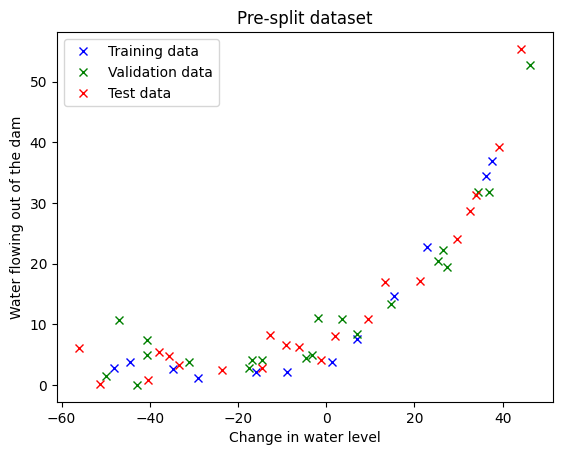

In [63]:
plt.plot(x_train, y_train, 'bx', label='Training data')
plt.plot(x_val, y_val, 'gx', label='Validation data')
plt.plot(x_test, y_test, 'rx', label='Test data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.title('Pre-split dataset')
plt.legend()

Concatenate our train data with the validation data and test data

we don't have enough data to have 3 sets

and then use sklearn train test split to split your data into training and test part.

you can use 30% of the full dataset for test

In [64]:
import numpy as np

x = np.concatenate([x_train, x_val, x_test], axis=0)
y = np.concatenate([y_train, y_val, y_test], axis=0)

x.shape, y.shape

((54, 1), (54, 1))

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [67]:
X_train.shape, X_test.shape

((37, 1), (17, 1))

### Linear regression with L2 regularization

Fit a Ridge regression

Reminder of the ridge regression:

Ridge regression, also known as L2 regularization, is a technique used to address the issue of multicollinearity in multiple regression models. Multicollinearity occurs when independent variables in a regression model are highly correlated, leading to instability in the estimation of the regression coefficients.

In ridge regression, we modify the cost function by adding a penalty equivalent to the square of the magnitude of the coefficients.

```
||y - Xw||^2_2 + alpha * ||w||^2_2
```

Look at the document of sklearn


In [68]:
from sklearn.linear_model import Ridge

In [70]:
alpha = 1.0

model = Ridge(alpha=alpha)
model.fit(X_train, y_train)

Ridge()

Create a function that is going to plot the training and the line of the linear regression (with L2 regularization)

The most simple approach to plot the line is to give 2 data points as input of our model and then get both predictions. Then you can call, with matplotlib

```
plt.plot(x_data, y_pred, 'b--', label='Prediction')
```

In [71]:
X_pred = np.array([[-60], [50]])
y_pred = model.predict(X_pred)

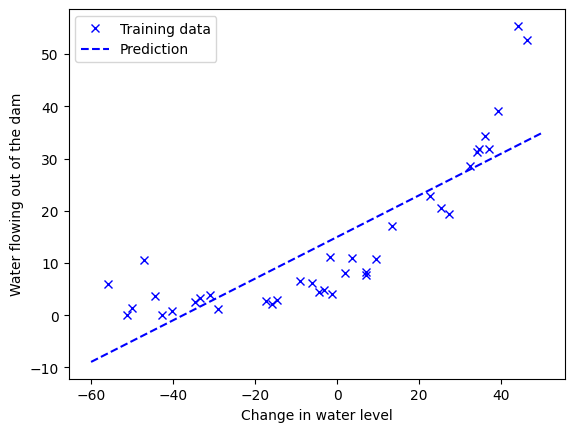

In [72]:
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(X_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

Now compute the score on the train and test set

In [75]:
model.score(X_train, y_train)

0.6962515093224275

In [74]:
model.score(X_test, y_test)

0.5426387271061411

### Polynomial regression

To simulate the polynomial regression we can use the polynomial features

Fit the Ridge regression with first:

- `PolynomialFeatures`

- `StandardScaler`


Use `alpha` = 0.001


In [76]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [77]:
alpha = 0.001

In [78]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=8)),
    ('scaler', StandardScaler()),
    ('lreg', Ridge(alpha=alpha))
])

In [80]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()), ('lreg', Ridge(alpha=0.001))])

Now we want to plot our results

Use linspace to generate a set of x on which we will apply our prediction

we will use those x with our y predictions and plot function from matplotlib to plot the curve.

Plot for both training and test set.

In [88]:
X_pred = np.linspace(-90, 60, 100).reshape(-1,1)
y_pred = pipe.predict(X_pred)

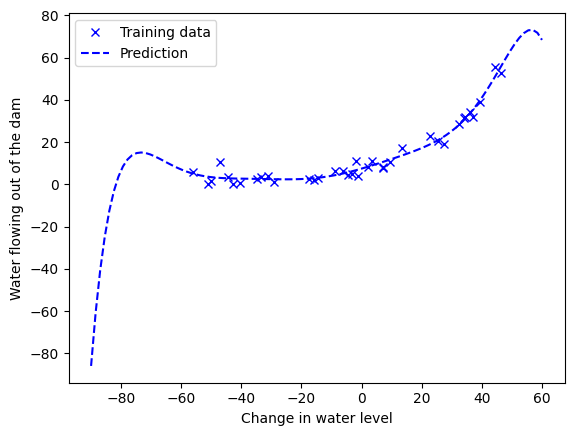

In [89]:
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(X_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

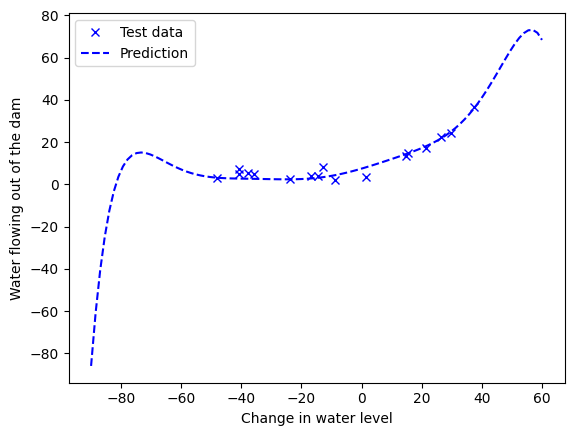

In [90]:
plt.plot(X_test, y_test, 'bx', label='Test data')
plt.plot(X_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

We should see some overfitting

now use `alpha` = 1

In [106]:
alpha = 1

pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=8)),
    ('scaler', StandardScaler()),
    ('lreg', Ridge(alpha=alpha))
])

In [107]:
X_train.shape, X_test.shape

((37, 1), (17, 1))

In [108]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()), ('lreg', Ridge(alpha=1))])

In [109]:
x_pred = np.linspace(-90, 60, 100).reshape(-1,1)
y_pred = pipe.predict(X_pred)

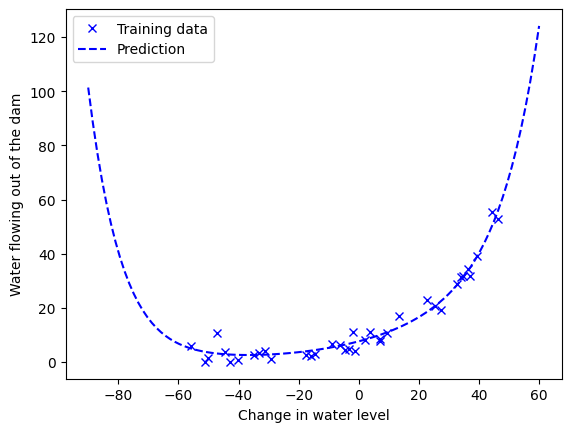

In [110]:
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(x_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

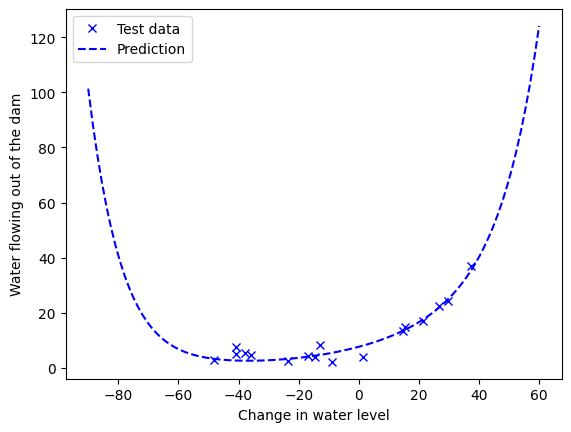

In [111]:
plt.plot(X_test, y_test, 'bx', label='Test data')
plt.plot(x_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

Display the train / test score

In [112]:
pipe.score(X_train, y_train)

0.9692314231536101

In [113]:
pipe.score(X_test, y_test)

0.9419246154218011

Now let's try to increase the alpha parameter to 100

In [99]:
pipe = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=8)),
    ('scaler', StandardScaler()),
    ('lreg', Ridge(alpha=100))
])

In [100]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(degree=8)),
                ('scaler', StandardScaler()), ('lreg', Ridge(alpha=100))])

In [101]:
x_pred = np.linspace(-90, 60, 100).reshape(-1,1)
y_pred = pipe.predict(X_pred)

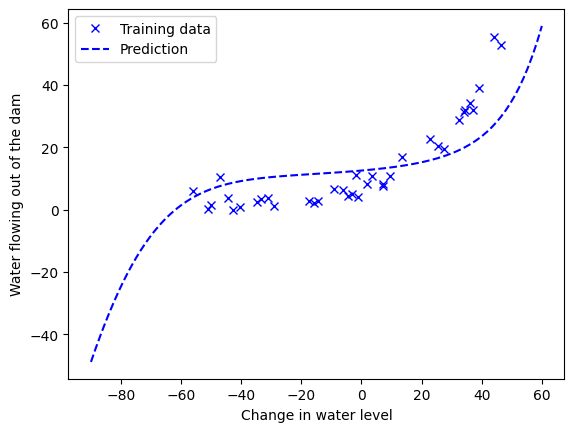

In [102]:
plt.plot(X_train, y_train, 'bx', label='Training data')
plt.plot(x_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

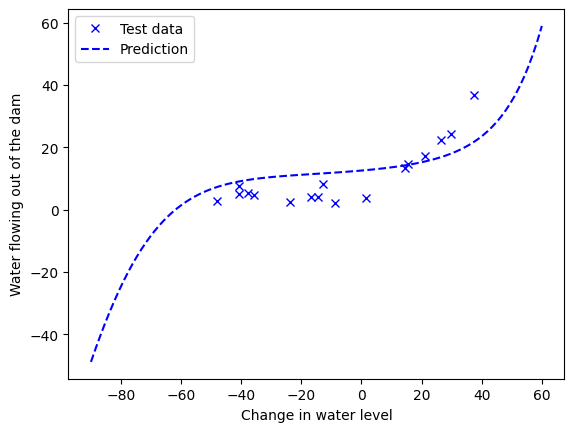

In [103]:
plt.plot(X_test, y_test, 'bx', label='Test data')
plt.plot(x_pred, y_pred, 'b--', label='Prediction')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dam')
plt.legend()

display the model score for training and test

In [104]:
pipe.score(X_train, y_train)

0.5751957405082114

In [105]:
pipe.score(X_test, y_test)

0.5064911800396581